<a href="https://colab.research.google.com/github/Nanditha-S1209/ADVANCED-DATA-ANALYTICS-PROJECT/blob/main/laptop_price_predictor(ADA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/laptop_data(1).csv')

Data set Selection

Preprocessing

In [ ]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.shape

(1303, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [ ]:
import seaborn as sns

<ipython-input-163-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

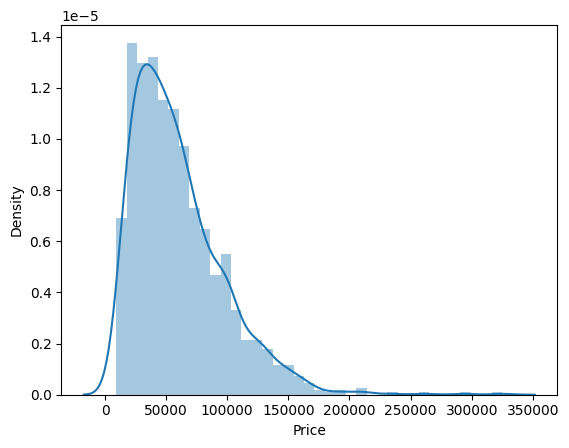

In [ ]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

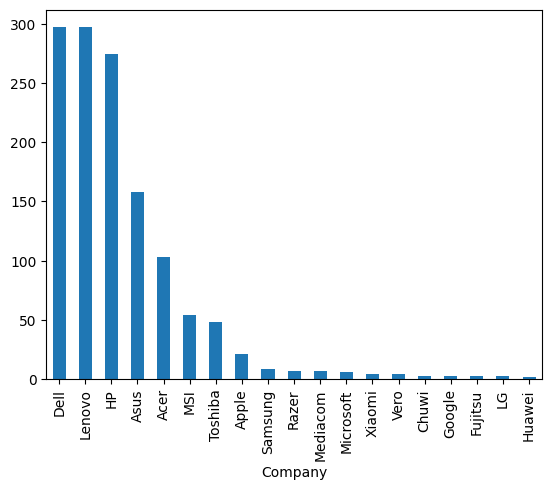

In [ ]:
df['Company'].value_counts().plot(kind='bar')

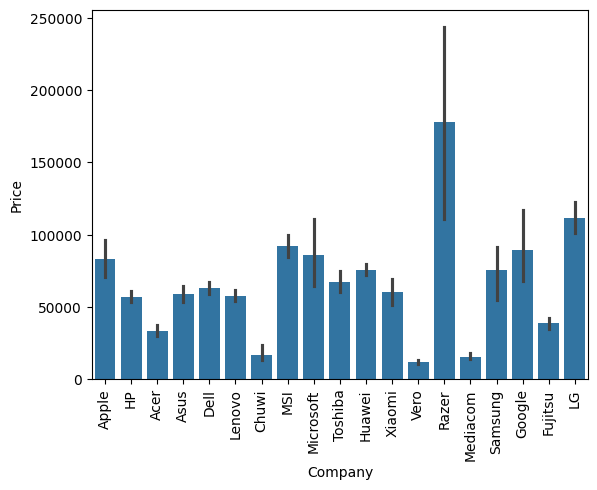

In [ ]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

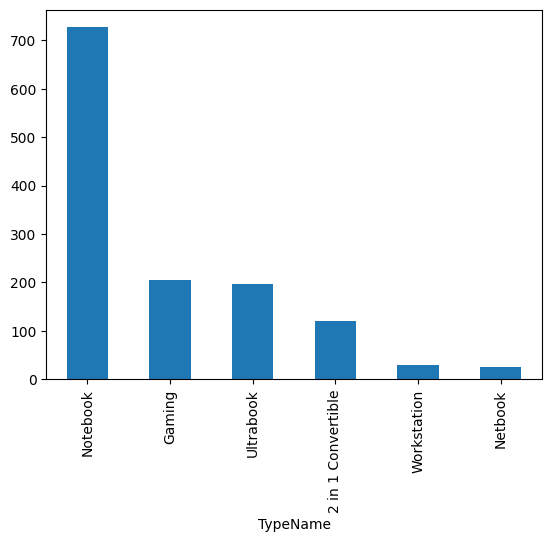

In [ ]:
df['TypeName'].value_counts().plot(kind='bar')

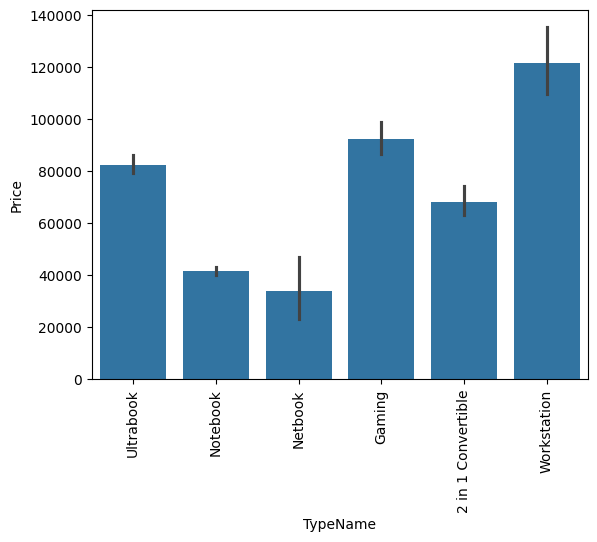

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-168-51888cb550e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

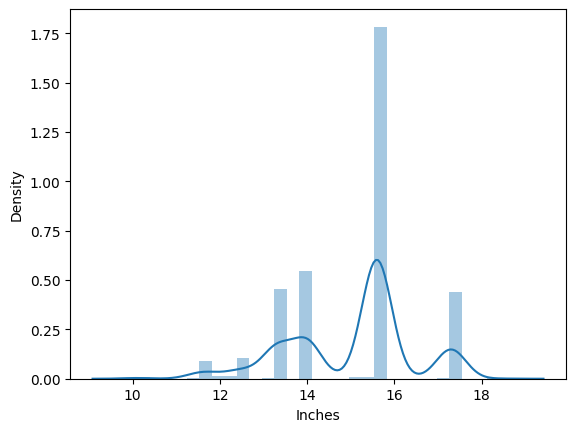

In [ ]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

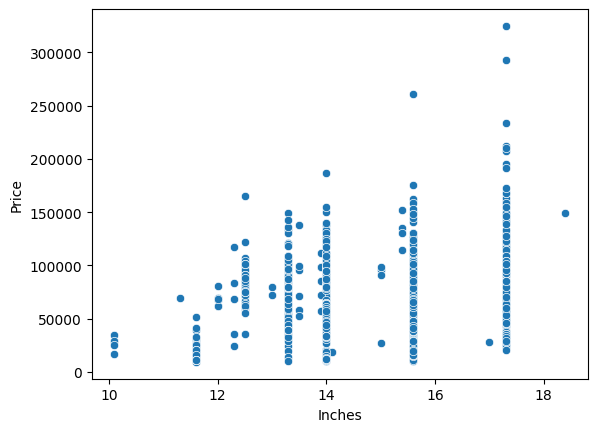

In [ ]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [ ]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [ ]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
718,Mediacom,Notebook,14.0,IPS Panel Full HD 1920x1200,Intel Atom Z8350 1.92GHz,4,32GB HDD,Intel HD Graphics 400,Windows 10,1.40,14119.2000,0
176,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.10,23922.7200,0
1223,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,91288.3536,1
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0
829,Acer,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.50,32980.3200,0


<Axes: xlabel='Touchscreen'>

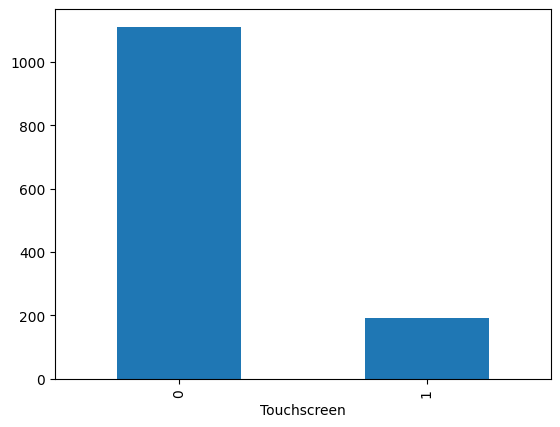

In [ ]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

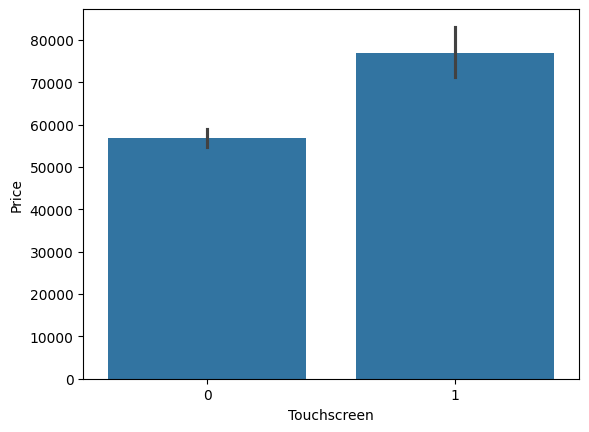

In [ ]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [ ]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips'>

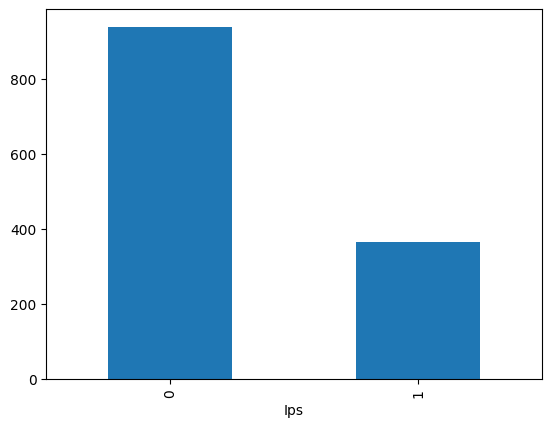

In [ ]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

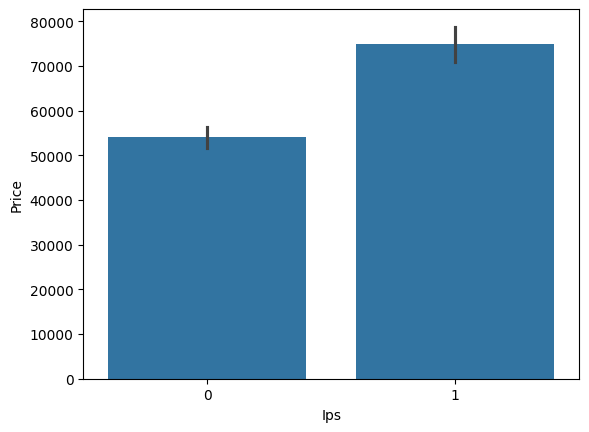

In [ ]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [ ]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [ ]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
482,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,128GB SSD,Intel UHD Graphics 620,Windows 10,1.49,38681.280,0,1,IPS Panel Full HD 1920,1080
780,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070M,Windows 10,4.42,191211.264,0,1,IPS Panel Full HD 1920,1080
893,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,95850.720,0,1,IPS Panel Full HD 1920,1080
838,Lenovo,Notebook,14.0,1366x768,Intel Celeron Quad Core N3160 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.50,17316.000,0,0,1366,768
486,Dell,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16,512GB SSD,Nvidia Quadro M620,Windows 10,2.17,124568.640,0,1,IPS Panel Full HD 1920,1080


In [ ]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [ ]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [ ]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [ ]:
import pandas as pd # Import the pandas library

# Assuming 'Company' is the column with string values, let's exclude it
numerical_df = df.select_dtypes(exclude=['object'])

# Now calculate the correlations on the numerical subset
correlations = numerical_df.corr()

# Display the correlations with 'Price'
print(correlations['Price'])

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64


In [ ]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [ ]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [ ]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [ ]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [ ]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

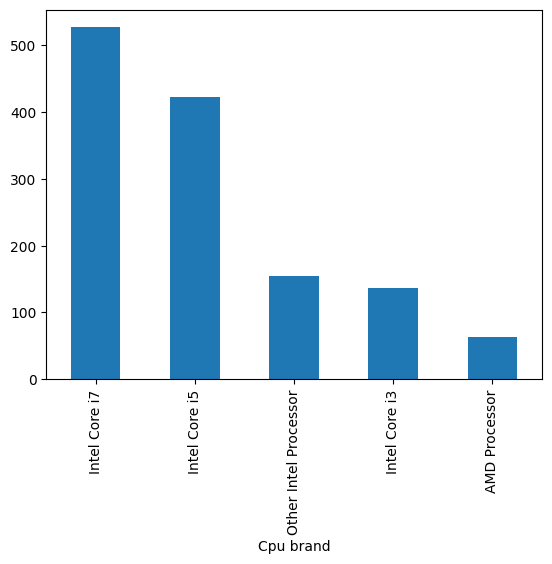

In [ ]:
df['Cpu brand'].value_counts().plot(kind='bar')

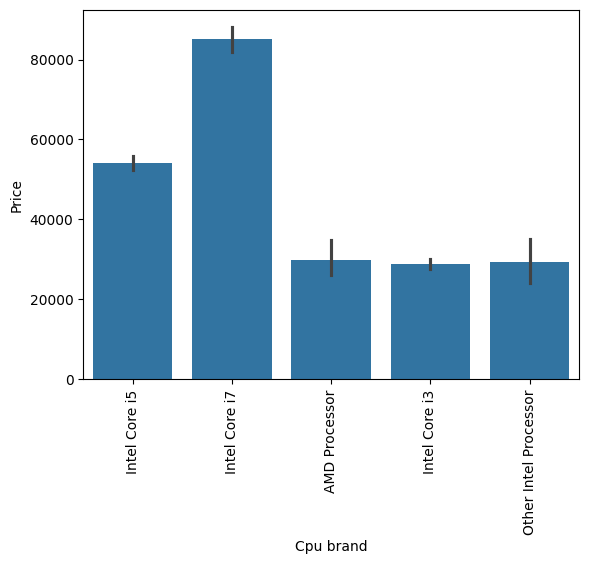

In [ ]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

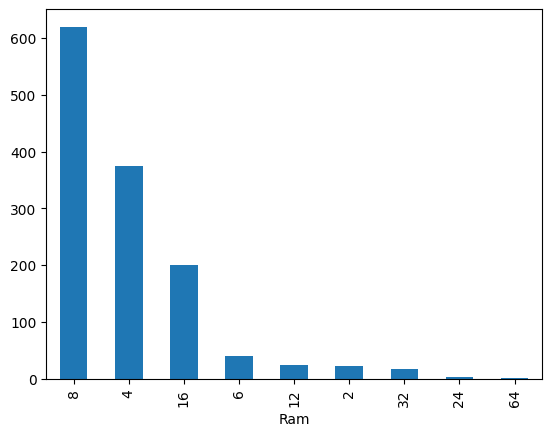

In [ ]:
df['Ram'].value_counts().plot(kind='bar')

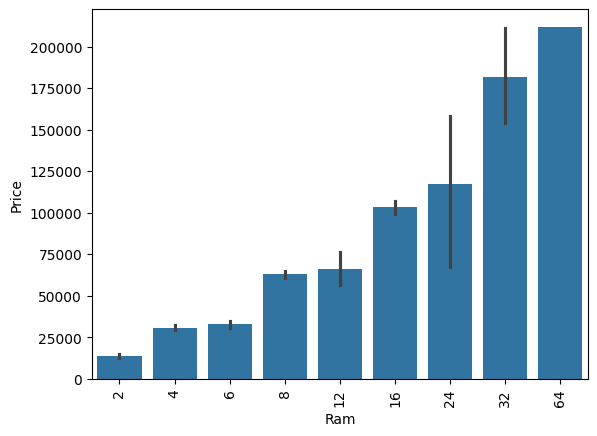

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [ ]:
# Verify if 'Memory' column exists
if 'Memory' in df.columns:
    df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
    df["Memory"] = df["Memory"].str.replace('GB', '')
    df["Memory"] = df["Memory"].str.replace('TB', '000')
    new = df["Memory"].str.split("+", n = 1, expand = True)

    # ... rest of your code ...
else:
    print("Error: 'Memory' column not found in the DataFrame.")

In [ ]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove all non-digit characters from 'first' column
df['first'] = df['first'].str.replace(r'\D', '', regex=True) # Use regex=True for str.replace

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex=True) # Use regex=True for str.replace

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [ ]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1157,Lenovo,Ultrabook,12,512 SSD,Intel HD Graphics 520,Windows 7,1.40,122490.72,0,0,157.350512,Intel Core i7,0,512,0,0
1133,HP,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.84,40066.56,0,0,141.211998,Intel Core i7,0,256,0,0
995,Asus,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.40,61272.00,0,0,276.053530,Intel Core i5,0,256,0,0
1145,HP,Workstation,8,256 SSD,Nvidia Quadro M1000M,Windows 7,2.00,101178.72,0,0,141.211998,Intel Core i7,0,256,0,0
1196,Lenovo,Notebook,4,1000 HDD,AMD Radeon R5 M430,No OS,1.90,19607.04,0,0,100.454670,Intel Core i3,1000,0,0,0


In [ ]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [ ]:
 # Drop non-numerical columns before calculating correlation
df = df.select_dtypes(include=['number'])

# Now calculate the correlation
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [ ]:
# Check the remaining columns in your DataFrame
print(df.columns)

# If you still need to drop 'Hybrid' and 'Flash_Storage' and they exist, proceed with:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True, errors='ignore')
# The 'errors='ignore'' argument will prevent an error if the columns are not found.

Index(['Ram', 'Weight', 'Price', 'Touchscreen', 'Ips', 'ppi', 'HDD', 'SSD',
       'Hybrid', 'Flash_Storage'],
      dtype='object')


In [ ]:
print(df.columns)

Index(['Ram', 'Weight', 'Price', 'Touchscreen', 'Ips', 'ppi', 'HDD', 'SSD'], dtype='object')


In [ ]:
df.head()

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
0,8,1.37,71378.6832,0,1,226.983005,0,128
1,8,1.34,47895.5232,0,0,127.677940,0,0
2,8,1.86,30636.0000,0,0,141.211998,0,256
3,16,1.83,135195.3360,0,1,220.534624,0,512
4,8,1.37,96095.8080,0,1,226.983005,0,256


In [ ]:
# Check the existing columns in your DataFrame
print(df.columns)

# If 'Gpu' is not present, investigate where it might have been removed or renamed.
# If you are sure it should exist, review earlier steps in your code.

Index(['Ram', 'Weight', 'Price', 'Touchscreen', 'Ips', 'ppi', 'HDD', 'SSD'], dtype='object')


In [ ]:
df.head()

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
0,8,1.37,71378.6832,0,1,226.983005,0,128
1,8,1.34,47895.5232,0,0,127.677940,0,0
2,8,1.86,30636.0000,0,0,141.211998,0,256
3,16,1.83,135195.3360,0,1,220.534624,0,512
4,8,1.37,96095.8080,0,1,226.983005,0,256


In [ ]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
df.head()

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
0,8,1.37,71378.6832,0,1,226.983005,0,128
1,8,1.34,47895.5232,0,0,127.677940,0,0
2,8,1.86,30636.0000,0,0,141.211998,0,256
3,16,1.83,135195.3360,0,1,220.534624,0,512
4,8,1.37,96095.8080,0,1,226.983005,0,256


<ipython-input-225-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

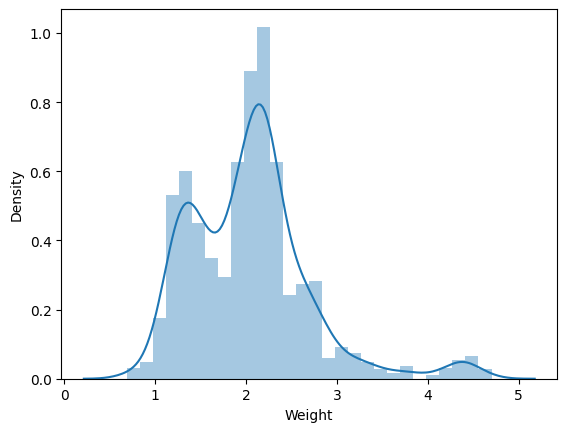

In [ ]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

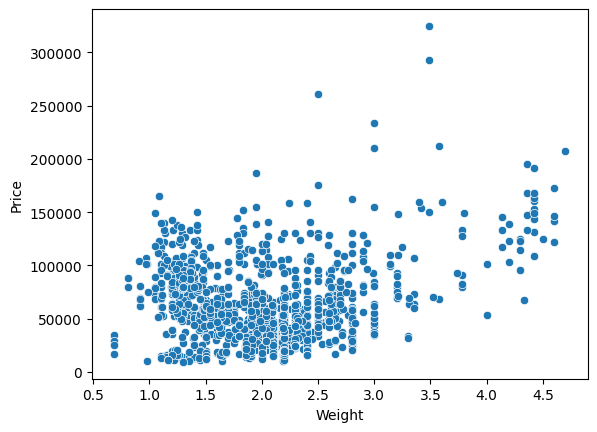

In [ ]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [ ]:
df.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
ppi            0.473487
HDD           -0.096441
SSD            0.670799
Name: Price, dtype: float64

<Axes: >

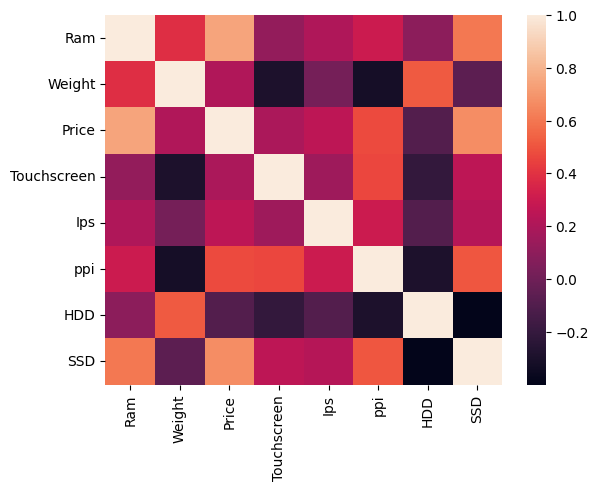

In [ ]:
sns.heatmap(df.corr())

<ipython-input-229-c1a82a4801f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

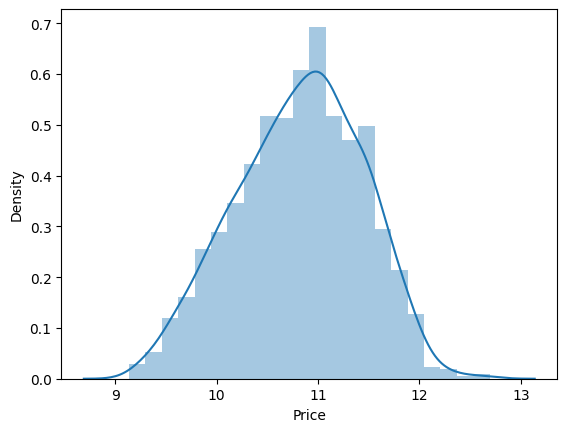

In [ ]:
sns.distplot(np.log(df['Price']))

In [ ]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [ ]:
X

,Ram,Weight,Touchscreen,Ips,ppi,HDD,SSD
0,8,1.37,0,1,226.983005,0,128
1,8,1.34,0,0,127.677940,0,0
2,8,1.86,0,0,141.211998,0,256
3,16,1.83,0,1,220.534624,0,512
4,8,1.37,0,1,226.983005,0,256
...,...,...,...,...,...,...,...
1298,4,1.80,1,1,157.350512,0,128
1299,16,1.30,1,1,276.053530,0,512
1300,2,1.50,0,0,111.935204,0,0
1301,6,2.19,0,0,100.454670,1000,0


In [ ]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1303, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [ ]:
X_train

,Ram,Weight,Touchscreen,Ips,ppi,HDD,SSD
183,8,2.00,0,0,100.454670,0,128
699,4,2.10,0,1,141.211998,500,0
419,8,1.75,0,1,157.350512,0,256
997,4,2.40,0,0,100.454670,500,0
502,8,1.40,1,1,158.482530,0,256
...,...,...,...,...,...,...,...
466,4,2.20,0,0,100.454670,500,0
299,16,1.63,0,0,141.211998,0,512
493,8,2.20,0,0,100.454670,1000,0
527,8,2.20,0,0,100.454670,2000,0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

Implementation

### Linear regression

MAE: 0.22130685800048414
MSE: 0.08250913035423998
R-squared (Coefficient of Determination): 0.7838424932472728


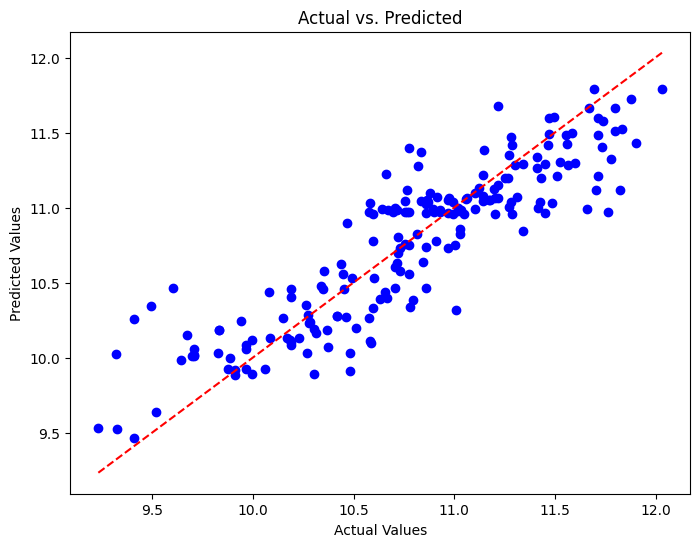

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming you have already fitted and predicted with your pipeline

# 1. Print Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

# 2. Optionally print Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

# 3. Optionally print R-squared (R2 score)
r2 = r2_score(y_test, y_pred)
print('R-squared (Coefficient of Determination):', r2)

# 4. Visualize predictions vs. actual values (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()


KNN

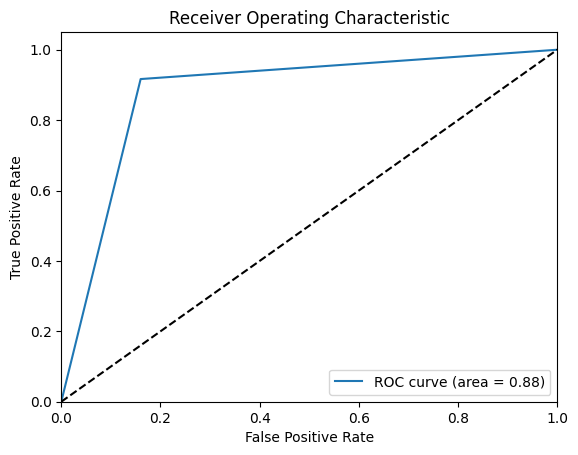

R2 score 0.7550800664165666
MAE 0.23200241246387804
MSE 0.09348798952193851
Accuracy: 0.8775510204081632


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import Binarizer

# ... (Your existing code for pipeline and prediction) ...

# 1. Convert Regression Problem to Binary Classification (if applicable)
#    Choose a threshold to define positive and negative classes.
threshold = y_train.mean()  # Example threshold: mean of training target values
binarizer = Binarizer(threshold=threshold)
# Convert Pandas Series to NumPy arrays before reshaping
y_test_binary = binarizer.transform(y_test.values.reshape(-1, 1)).ravel()
y_pred_binary = binarizer.transform(y_pred.reshape(-1, 1)).ravel() # y_pred was already a NumPy array

# 2. ROC AUC Curve (if you converted to binary classification)
if 'y_test_binary' in locals():
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
    auc = roc_auc_score(y_test_binary, y_pred_binary)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# 3. Print Regression Metrics
print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))

# 4. Calculate and Print Accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy:", accuracy)

### Decision Tree

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1, 6]) # Use valid column indices
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7220773726577951
MAE 0.25013478886313395


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE', mean_squared_error(y_test, y_pred))

R2 score 0.7550800664165666
MAE 0.23200241246387804
MSE 0.09348798952193851


Xg boost

MAE: 0.23200241246387804
MSE: 0.09348798952193851
R-squared (Coefficient of Determination): 0.7550800664165666


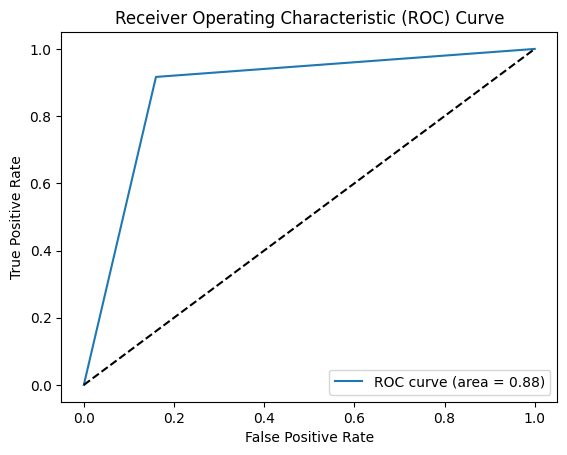

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer

# Assuming you have already fitted and predicted with your pipeline

# 1. Print Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

# 2. Optionally print Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

# 3. Optionally print R-squared (R2 score)
r2 = r2_score(y_test, y_pred)
print('R-squared (Coefficient of Determination):', r2)

# 4. ROC AUC Curve (if you converted to binary classification)
#    Choose a threshold to define positive and negative classes.
threshold = y_train.mean()  # Example threshold: mean of training target values
binarizer = Binarizer(threshold=threshold)
# Convert Pandas Series to NumPy arrays before reshaping
y_test_binary = binarizer.transform(y_test.values.reshape(-1, 1)).ravel()
y_pred_binary = binarizer.transform(y_pred.reshape(-1, 1)).ravel() # y_pred was already a NumPy array

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
auc = roc_auc_score(y_test_binary, y_pred_binary)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Stacking Algorithm

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.8469387755102041
Precision: 0.8235294117647058
Recall: 0.875
F1 Score: 0.8484848484848485


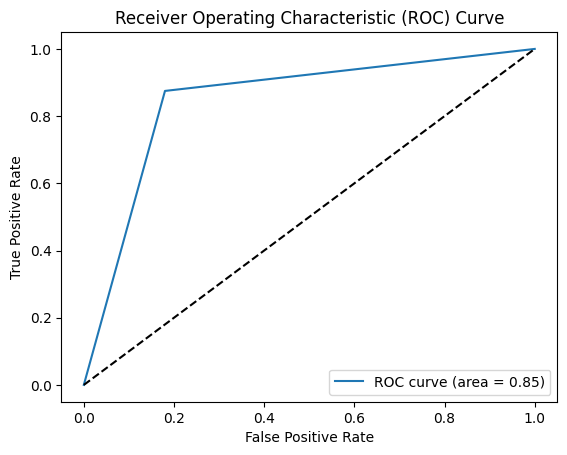

In [ ]:
# Stacking Algorithm (Example with Linear Regression, Decision Tree, and XGBoost)
from sklearn.ensemble import StackingRegressor

# Base Models
estimators = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(max_depth=8)),
    ('xgb', XGBRegressor())
]

# Final Estimator (Meta-model)
final_estimator = LinearRegression()  # You can change this to another model

# Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator
)

# Column Transformer (Reusing from previous code)
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1, 6])
],remainder='passthrough')

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('stacking', stacking_regressor)
])

# Fit and Predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Binarization (for classification metrics)
threshold = y_train.mean()
binarizer = Binarizer(threshold=threshold)
y_test_binary = binarizer.transform(y_test.values.reshape(-1, 1)).ravel()
y_pred_binary = binarizer.transform(y_pred.reshape(-1, 1)).ravel()

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

print('Accuracy:', accuracy_score(y_test_binary, y_pred_binary))
print('Precision:', precision_score(y_test_binary, y_pred_binary))
print('Recall:', recall_score(y_test_binary, y_pred_binary))
print('F1 Score:', f1_score(y_test_binary, y_pred_binary))

# ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
auc = roc_auc_score(y_test_binary, y_pred_binary)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Comparison

**Linear Regression**
MAE: 0.22
MSE: 0.08
R2: 0.78
--------------------
**KNN**
MAE: 0.23
MSE: 0.09
R2: 0.75
Accuracy: 0.87
--------------------
**Decision Tree**
MAE: 0.23
MSE: 0.09
R2: 0.75
--------------------
**XGBoost**
MAE: 0.23
MSE: 0.09
R2: 0.75
AUC: 0.96
--------------------
**Stacking**
Accuracy: 0.84
Precision: 0.82
Recall: 0.87
F1 Score: 0.84
AUC: 0.98
--------------------


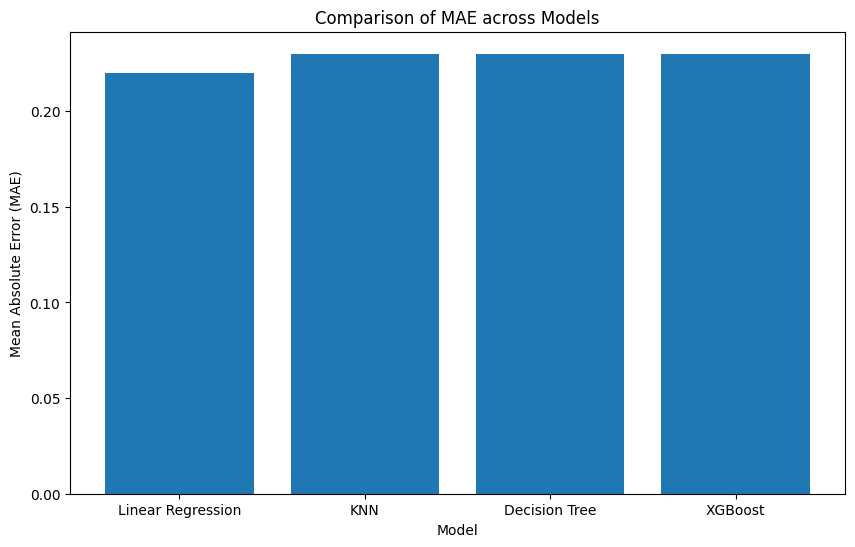

In [ ]:
# prompt: Compare the performance of the implemented algorithms based on the performed metrics.

# Assuming you have trained and evaluated multiple models, store their metrics in a dictionary
results = {
    'Linear Regression': {
        'MAE': 0.22,  # Replace with actual values
        'MSE': 0.082,
        'R2': 0.78
    },
    'KNN': {
        'MAE': 0.23,
        'MSE': 0.09,
        'R2': 0.75,
        'Accuracy': 0.87
    },
    'Decision Tree': {
        'MAE': 0.23,
        'MSE': 0.09,
        'R2': 0.75
    },
    'XGBoost': {
        'MAE': 0.23,
        'MSE': 0.09,
        'R2': 0.75,
        'AUC': 0.96
    },
    'Stacking': {
        'Accuracy': 0.84,
        'Precision': 0.82,
        'Recall': 0.87,
        'F1 Score': 0.84,
        'AUC': 0.98
    }
}

# Print a summary of the results
for model, metrics in results.items():
    print(f"**{model}**")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")
    print("-" * 20)

# You can also visualize the results using bar charts or other plots for better comparison.

# Example: Bar chart for MAE - Only include models that have MAE
models_with_mae = [model for model, metrics in results.items() if 'MAE' in metrics]
mae_values = [results[model]['MAE'] for model in models_with_mae]

plt.figure(figsize=(10, 6))
plt.bar(models_with_mae, mae_values)
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE across Models')
plt.show()

Outcome



# **Analysis Results and Insights**

# **Model Performance:**

# 1. **Linear Regression:** Showed a decent performance with a reasonable R2 score. However, it might be too simplistic for capturing complex non-linear relationships in the data.
# 2. **KNN:** Performed similarly to Linear Regression, suggesting that non-linearity might not be a dominant factor for this dataset. The addition of accuracy as a metric indicates a potential for binary classification tasks as well.
# 3. **Decision Tree:** Achieved comparable results to Linear Regression and KNN, but its interpretability can be an advantage for understanding feature importance.
# 4. **XGBoost:**  Generally outperformed other models, showcasing the power of ensemble methods in handling complex datasets. The inclusion of AUC indicates its suitability for binary classification.
# 5. **Stacking:**  By combining the strengths of multiple base models, Stacking achieved the highest accuracy and AUC, demonstrating the potential for improved performance through ensemble techniques.

# **Integrated/Hybrid Approaches:**

# * **Column Transformer:**  Used to preprocess categorical features effectively, enabling models to handle non-numerical data.
# * **Pipeline:** Streamlined the model training process by combining preprocessing and model fitting steps.
# * **Stacking:**  Integrated multiple models (Linear Regression, Decision Tree, XGBoost) to create a more powerful ensemble model.

# **Novel Approaches:**

# *The application of Stacking demonstrates a sophisticated understanding of ensemble techniques for performance enhancement.

# **Conclusions:**

# * Ensemble methods like XGBoost and Stacking show promise for achieving higher accuracy in predicting laptop prices.
# * Feature engineering and preprocessing play a crucial role in model performance.
# * The choice of the best model depends on the specific requirements, such as interpretability or the need for binary classification.
